# ScRNA-Seq of human PBMCs

<br>Data from [Sun, Z. et al.](https://www.nature.com/articles/s41467-019-09639-3)
<br>Data: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3665019

In [1]:
# Import packages
import scanpy as sc
import pandas as pd
from functions import data_preprocessing as dp
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Add cell type labels

In [2]:
norm_qc_adata = sc.read_h5ad("PBMCs_5_adata.h5ad")
labels = pd.read_csv("PBMCs_5_labels.txt")
labels.shape

(2272, 1)

In [3]:
norm_qc_adata.obs["cell_type"] = list(labels.iloc[:,0])

In [4]:
norm_qc_adata

AnnData object with n_obs × n_vars = 2272 × 10188
    obs: 'n_counts', 'log_n_counts', 'n_genes', 'log_n_genes', 'pct_counts_in_top_20_genes', 'mt_frac', 'ribo_frac', 'hem_frac', 'outlier', 'size_factors', 'cell_type'
    var: 'gene_id', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    layers: 'log1p_counts', 'pp_counts'

## Visualize

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


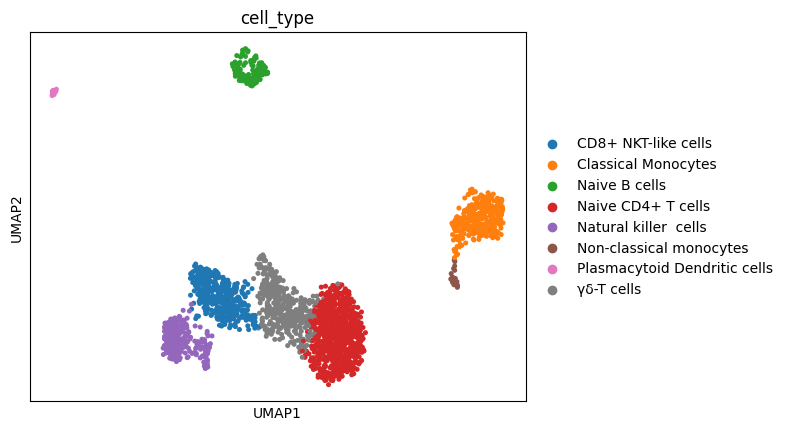

In [5]:
from sklearn.preprocessing import StandardScaler
vis_adata = norm_qc_adata.copy()
sc.pp.highly_variable_genes(vis_adata, n_top_genes=4000, flavor="cell_ranger")

# Scale data using dp.scale_data() to subtract data by the mean of each feature and divide by the std of that feature.
# This was done as a preprocessing step for annotating cell types in ScType in R and will therefore be used for visualization purpose. 
# https://github.com/satijalab/seurat/issues/1166  
vis_adata.X = dp.scale_data(vis_adata.X)

sc.pp.pca(vis_adata, n_comps=20, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(vis_adata)
sc.tl.umap(vis_adata)
sc.pl.umap(vis_adata, color='cell_type')

## Download processed data, including labels

In [6]:
norm_qc_adata.write("../../../../../data/processed/immune_cells/pbmcs_human/PBMCs_5_adata.h5ad")

In [7]:
import os

os.remove("PBMCs_5.csv")
os.remove("PBMCs_5_adata.h5ad")
os.remove("PBMCs_5_labels.txt")